In [73]:
%%capture
%run final_chars_classification.ipynb



In [92]:
%run table_detector.ipynb

In [75]:
%run final_functions.ipynb

In [100]:
%run preprocessing.ipynb

In [77]:
%run get_rows_number.ipynb

In [78]:
# initialize_models(True)
# load_models()

In [79]:
from tabular import tabular

In [104]:
def solve_expression(img, is_table = False, showTrace = False):
    
    img = cv2.resize(img, (2448, 3264)) # size of A4
    img = img.astype(np.uint8)
    if(is_table):
        # show_images([table_tany(img)])
        # table_tany(img) 
        
        img = table_preprocessing(img, showTrace)
        if showTrace:
            show_images([img])

        cells, col_num, row_num = box_extraction(img, showTrace= showTrace)#, table= True)

        letters = [classify(i, is_letter=True) for i in cells[0:col_num]]
        numbers = [classify(i, is_0_1=True) for i in cells[col_num:]]
        
        numbers = [int(i) for i in numbers]
        
        print(letters)
        if showTrace:
            print(letters)
            print(numbers)
            print('cols numbers ' + str(col_num))
        print('cols numbers ' + str(col_num))
        
        
        solver = tabular.McCluskey()
        solver.solve(numbers,col_num)
        
        solver.logic()
        

    else: 

        img = expression_preprocessing(img, showTrace)
        if showTrace:
            show_images([img])

        expression_rows = get_rows_number(img)
        
        if showTrace:
            show_images(expression_rows)
        expressions = [classify(i, is_expression=True, verbose=showTrace) for i in expression_rows ]
        
        if showTrace: print(expressions)
        return [get_table(expression) for expression in expressions]

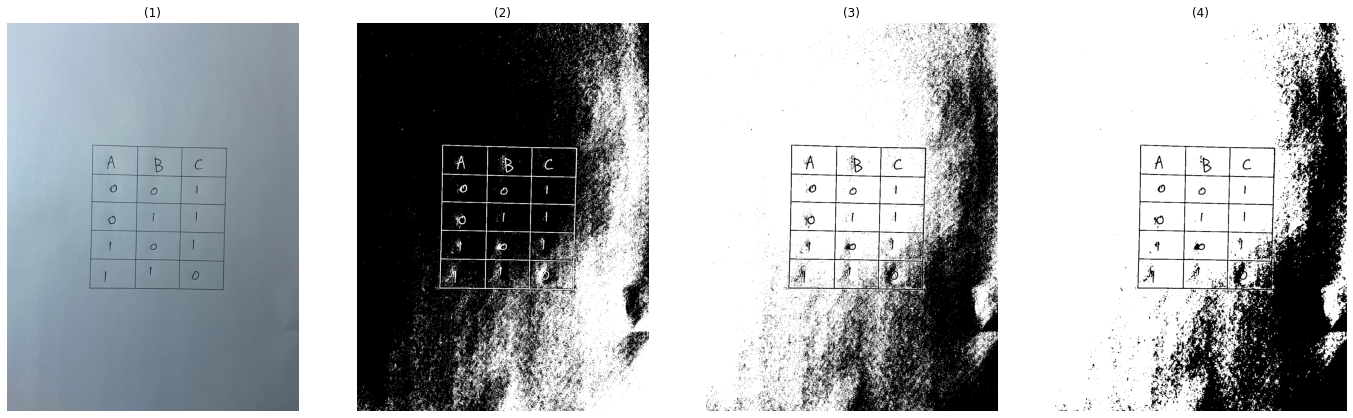

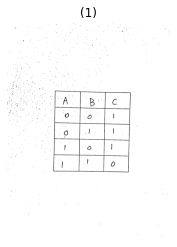

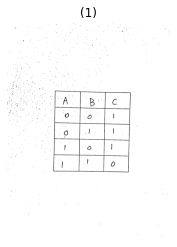

count rows 5
14
2 5


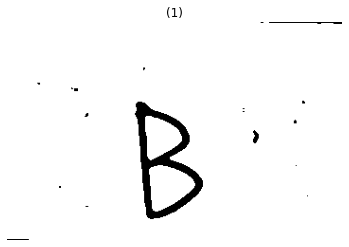

354 2448
230 3264


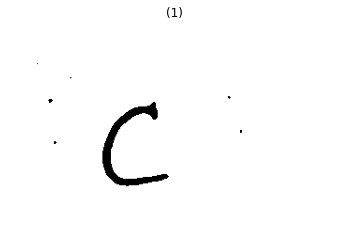

358 2448
228 3264


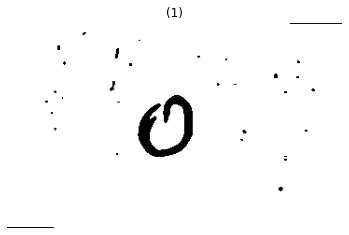

359 2448
220 3264


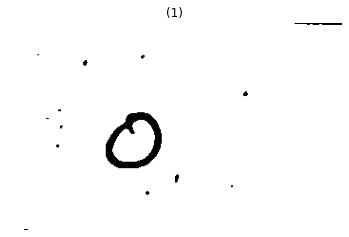

353 2448
218 3264


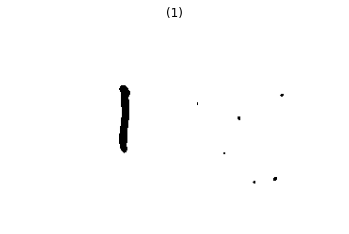

356 2448
217 3264


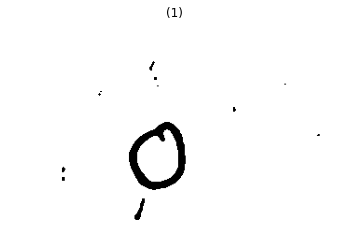

360 2448
226 3264


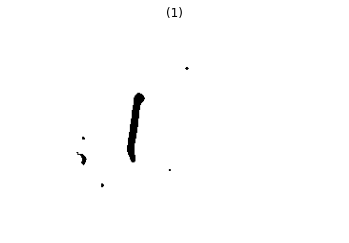

352 2448
224 3264


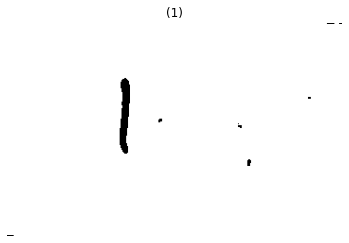

354 2448
225 3264


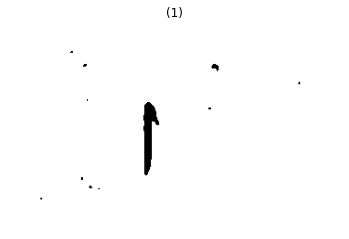

361 2448
225 3264


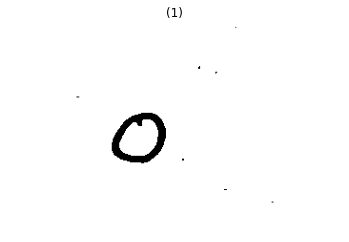

352 2448
223 3264


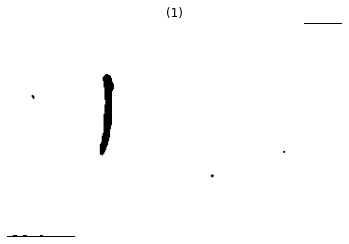

354 2448
226 3264


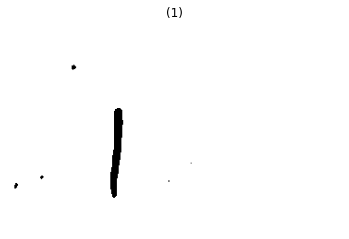

363 2448
227 3264


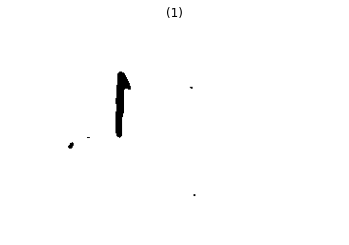

352 2448
226 3264


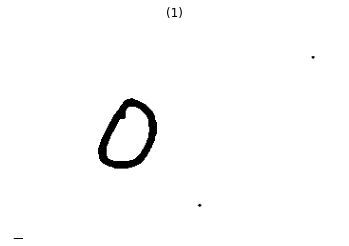

353 2448
228 3264


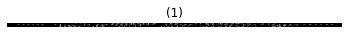

TypeError: only size-1 arrays can be converted to Python scalars

In [105]:
image = cv2.imread("./test_images/t15.jpg")

result = solve_expression(image, is_table=True, showTrace=True)

# for r in result: 
#     print(r)


